# Exercice 1 : Génération de Texte avec GPT-2

In [4]:
from transformers import pipeline

# Chargement du modèle GPT-2 allégé
generator = pipeline("text-generation", model="distilgpt2")

# Prompt de départ
prompt = "Une journée ensoleillée commence avec "

# Génération de texte avec des ajustements
output = generator(
    prompt,
    max_length=50,
    temperature=0.7,
    truncation=True,  # Ajout du troncage explicite
    pad_token_id=50256  # Définit un pad_token_id correct (50256 est celui de GPT-2)
)

print(output[0]['generated_text'])

Une journée ensoleillée commence avec été pas la réalité du Québec, l'affaire pour l'affaires, environement et la réalité du Québec, l'affaires


# Exercice 2 : Résumé Automatique avec T5

In [7]:
from transformers import pipeline

# Chargement du modèle de résumé
summarizer = pipeline("summarization", model="t5-small")

# Texte à résumer
text = """
L’intelligence artificielle transforme de nombreux secteurs comme la santé, la finance et les transports,
permettant d’automatiser des tâches complexes et d’améliorer la prise de décision.
"""

# Résumé avec des longueurs ajustées
summary = summarizer(
    "summarize: " + text,  # Ajout du préfixe
    max_length=30,         # Ajusté pour être plus court que le texte d'entrée
    min_length=5,          # Longueur minimale du résumé
    do_sample=False
)

print(summary[0]['summary_text'])

l'intelligence artificielle transforme de nombreux secteurs comme la santé, la finance et les transports .


# Exercice 3 : Classification d’Images avec MobileNet

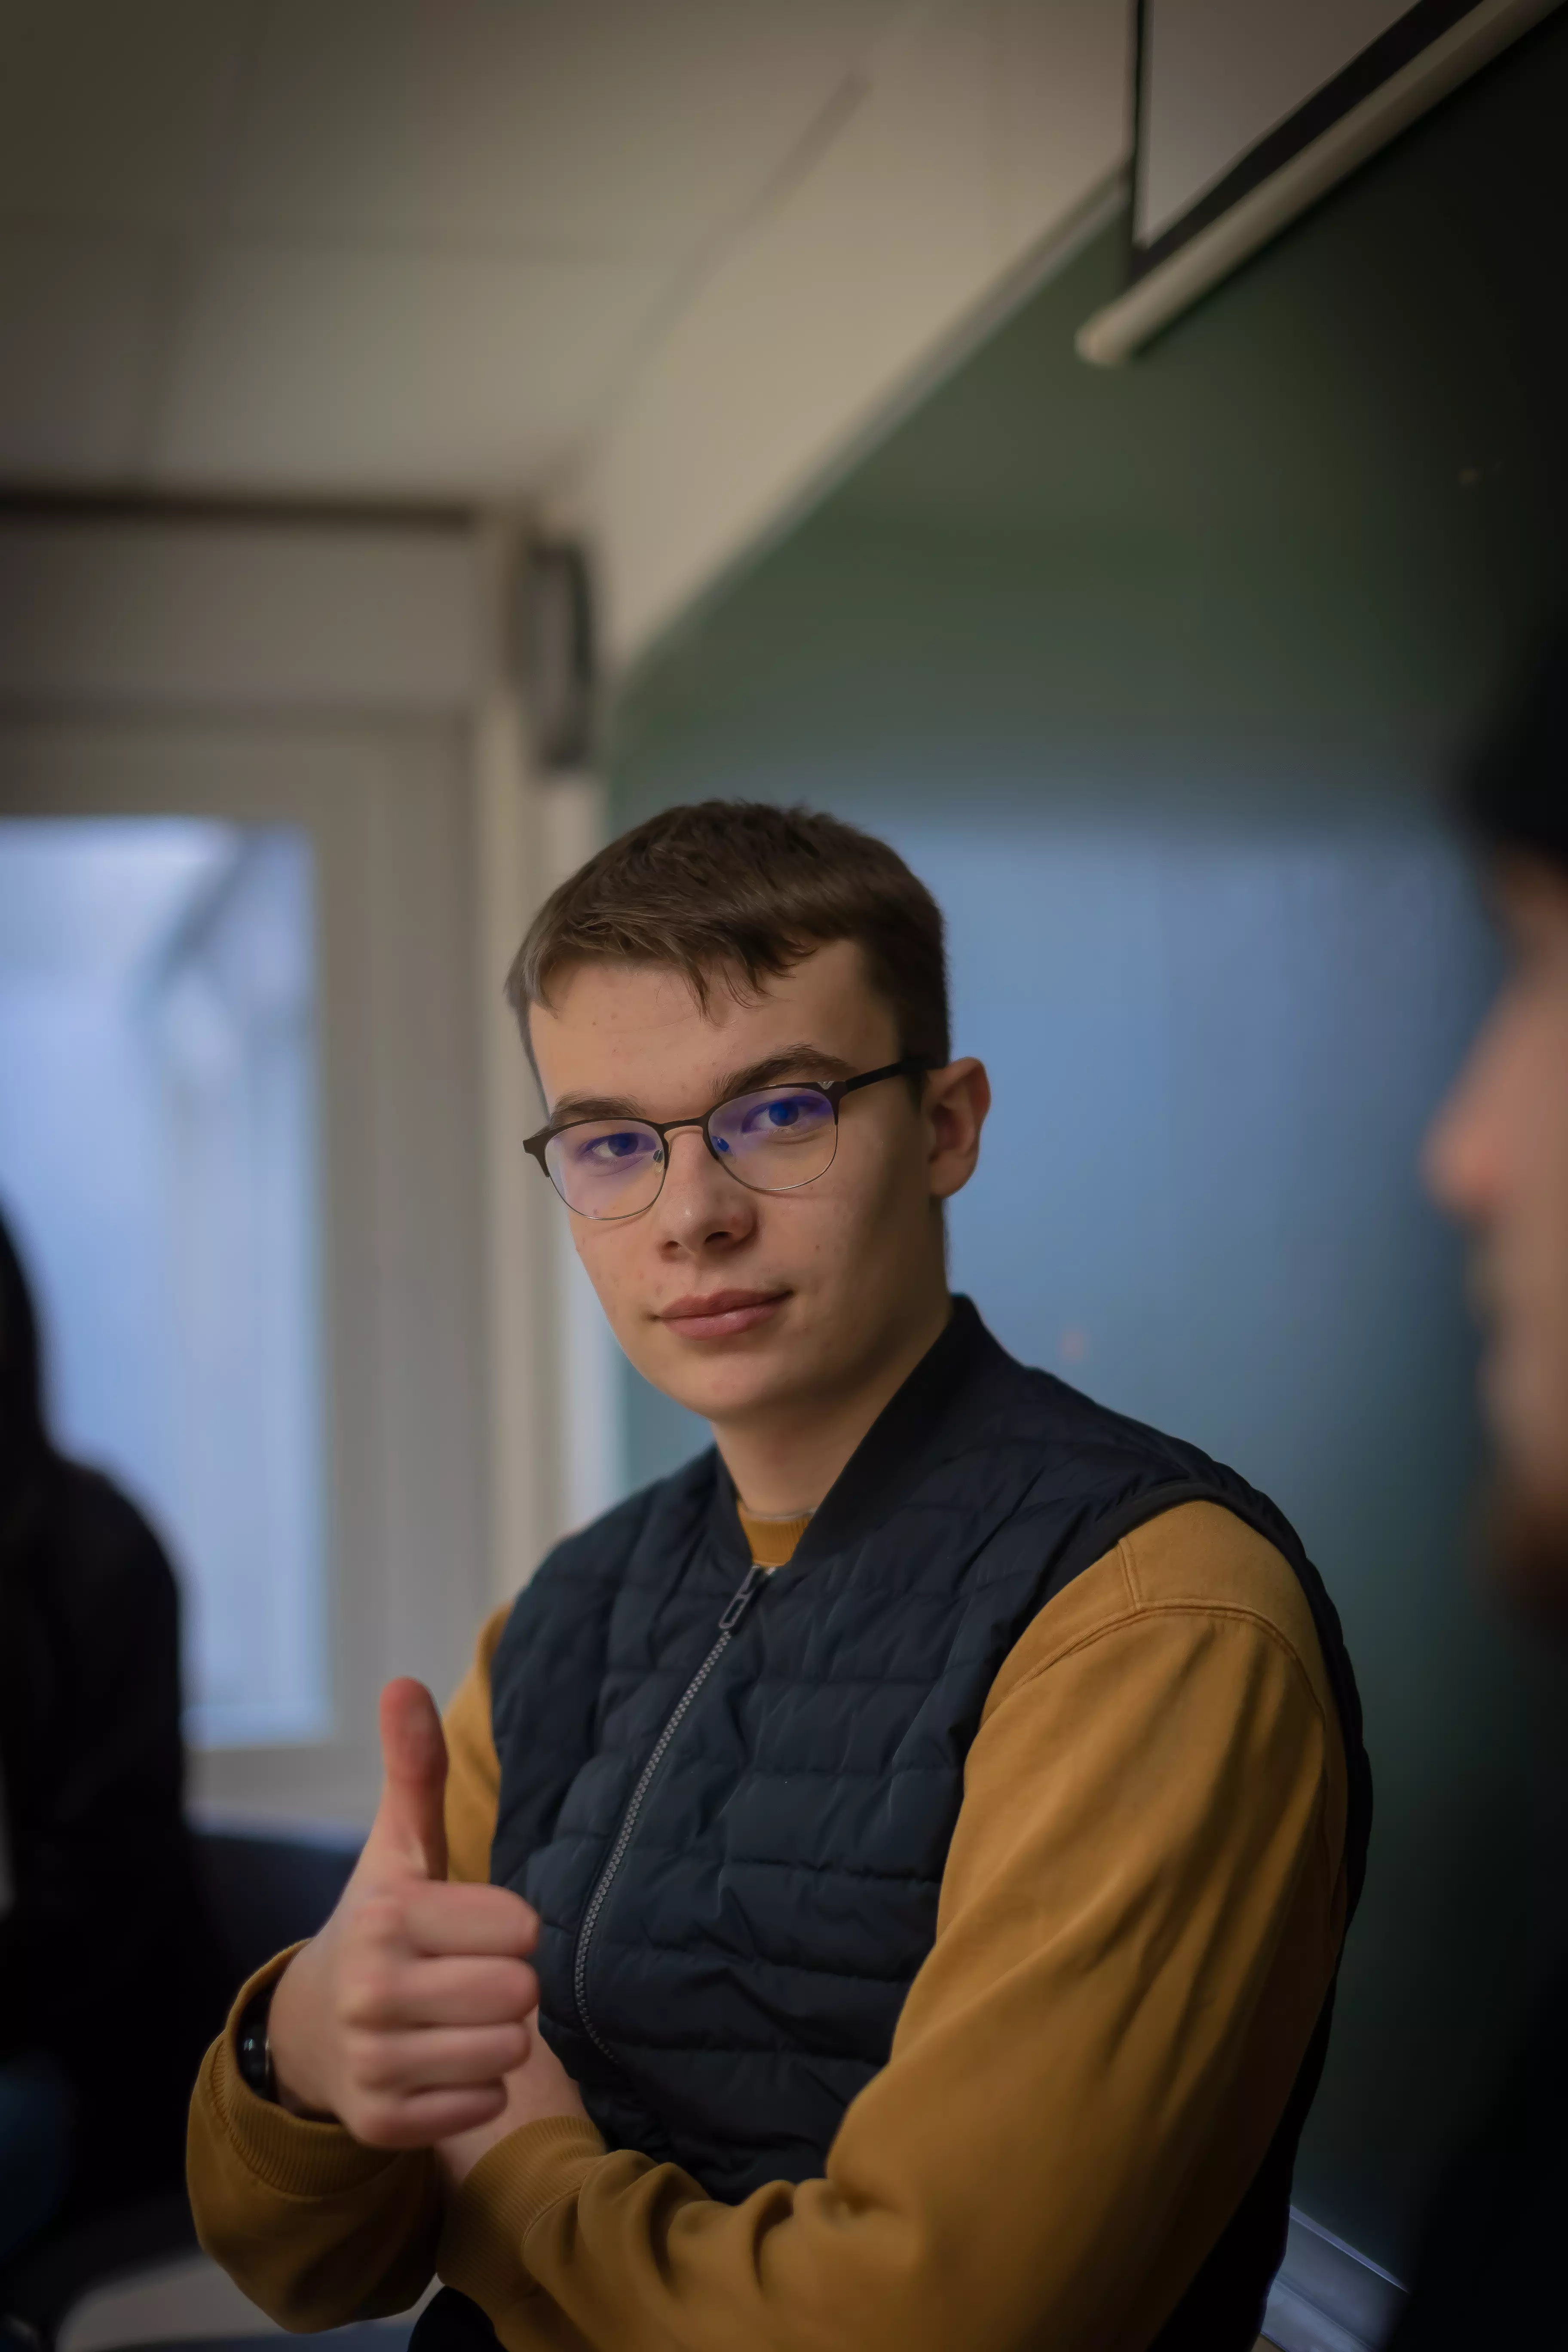

Label: suit, suit of clothes - Score: 0.3537
Label: academic gown, academic robe, judge's robe - Score: 0.0361
Label: Windsor tie - Score: 0.0264
Label: notebook, notebook computer - Score: 0.0212
Label: television, television system - Score: 0.0181


In [2]:
from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO

# Charger le pipeline de classification d'images avec MobileNet (Google)
classifier = pipeline("image-classification", model="google/mobilenet_v2_1.0_224")

# Charger une image depuis une URL
image_url = "http://qbuteau.fr/assets/qbuteau-presentation-CjzGnhmz.webp"

# Récupérer l'image
response = requests.get(image_url, stream=True)

# Vérifier que la requête est réussie
if response.status_code == 200:
    try:
        image = Image.open(BytesIO(response.content))
        image = image.convert("RGB")  # S'assurer que l'image est en RGB
        image.show()  # Afficher l'image

        # Classification de l'image
        predictions = classifier(image)

        # Afficher les prédictions
        for pred in predictions:
            print(f"Label: {pred['label']} - Score: {pred['score']:.4f}")

    except Exception as e:
        print(f"Erreur lors du chargement de l'image: {e}")
else:
    print(f"Erreur de requête: {response.status_code}")

# Exercice 4 : Correction Orthographique avec un modèle BART

In [1]:
from transformers import pipeline

# Charger le pipeline de génération de texte avec BART
corrector = pipeline("text2text-generation", model="facebook/bart-large-cnn")

# Texte avec fautes
text_with_errors = "I lik Strenger Things."

# Correction par le modèle
correction = corrector(text_with_errors, max_length=100, do_sample=False)

# Afficher le résultat
print("Texte original :", text_with_errors)
print("Texte corrigé :", correction[0]['generated_text'])


Texte original : I lik Strenger Things.
Texte corrigé : "I lik Strenger Things. I lik StreNGer Things," he says. "I like Strengers Things. That's what I like about them." "I'm a little bit of a nerd," he adds. "It's fun. I like it. It's fun"


# Exercice 5 : Analyse de Sentiments avec Pandas & Matplotlib

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

                                          Phrase Sentiment     Score
0             I love this product! It's amazing.  POSITIVE  0.999887
1  This is the worst experience I have ever had.  NEGATIVE  0.999763
2                       I'm feeling great today!  POSITIVE  0.999870
3     The service was okay, but could be better.  NEGATIVE  0.969898
4       I am very disappointed with the quality.  NEGATIVE  0.999774


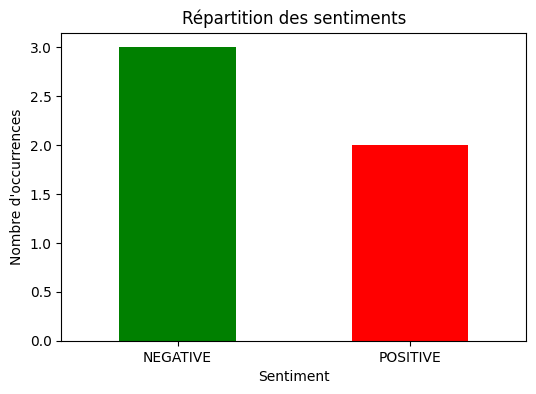

In [1]:
# Importation des bibliothèques
from transformers import pipeline
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du modèle d'analyse de sentiments
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Liste de phrases à analyser
phrases = [
    "I love this product! It's amazing.",
    "This is the worst experience I have ever had.",
    "I'm feeling great today!",
    "The service was okay, but could be better.",
    "I am very disappointed with the quality."
]

# Analyse des sentiments
results = sentiment_analyzer(phrases)

# Stocker les résultats dans un DataFrame Pandas
df = pd.DataFrame({"Phrase": phrases, "Sentiment": [res['label'] for res in results], "Score": [res['score'] for res in results]})

# Afficher les résultats
print(df)

# Création de l'histogramme des sentiments
sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "red"])
plt.xlabel("Sentiment")
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des sentiments")
plt.xticks(rotation=0)
plt.show()

# Exercice 6 : Détection de Langue et Analyse Statistique

                             Texte Langue     Score
0    Bonjour, comment allez-vous ?     fr  0.994251
1              Hello, how are you?     en  0.839918
2               Hola, ¿cómo estás?     es  0.992595
3          Hallo, wie geht es dir?     de  0.995338
4                 Ciao, come stai?     it  0.994836
5                Привет, как дела?     ru  0.992184
6                Ich bein Quentin.     de  0.949057
7  J'aime manger de la nourriture.     fr  0.988912
8               Merhaba, nasılsın?     tr  0.994048
9            Je m'appelle Quentin.     fr  0.992937


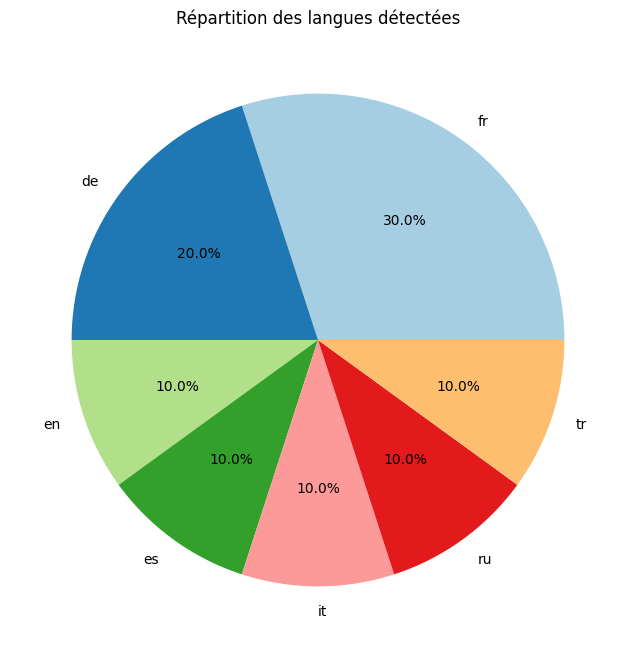

In [2]:
# Importation des bibliothèques
from transformers import pipeline
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du modèle de détection de langue
language_detector = pipeline("text-classification", model="papluca/xlm-roberta-base-language-detection")

# Liste de phrases en différentes langues
texts = [
    "Bonjour, comment allez-vous ?",  # Français
    "Hello, how are you?",  # Anglais
    "Hola, ¿cómo estás?",  # Espagnol
    "Hallo, wie geht es dir?",  # Allemand
    "Ciao, come stai?",  # Italien
    "Привет, как дела?",  # Russe
    "Ich bein Quentin.",  # Allemand
    "J'aime manger de la nourriture.",  # Français
    "Merhaba, nasılsın?",  # Turc
    "Je m'appelle Quentin."  # Français
]

# Détection des langues
results = language_detector(texts)

# Stockage des résultats dans un DataFrame Pandas
df = pd.DataFrame({"Texte": texts, "Langue": [res['label'] for res in results], "Score": [res['score'] for res in results]})

# Afficher les résultats
print(df)

# Création d'un graphique en camembert des langues détectées
language_counts = df["Langue"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Répartition des langues détectées")
plt.show()

# Exercice 7 : Détection d’Anomalies avec Isolation Forest

/tmp/ipykernel_2992/1853299229.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df[df["Anomaly"] == -1]["Feature 1"], df[df["Anomaly"] == -1]["Feature 2"],


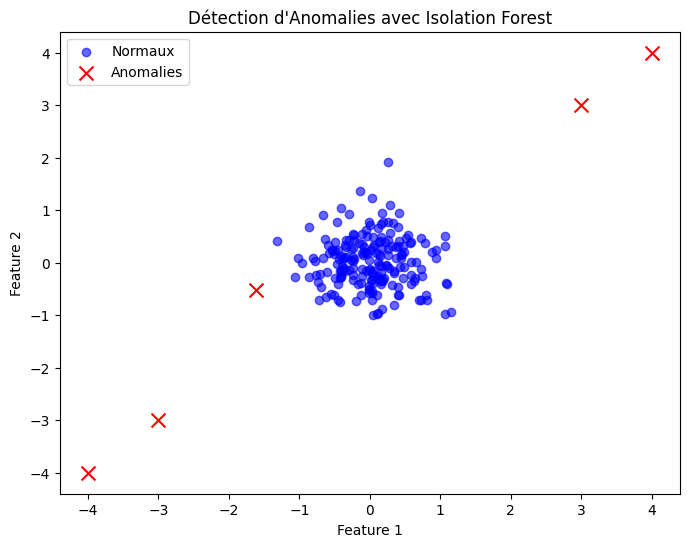

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Générer un jeu de données synthétique (valeurs normales)
rng = np.random.RandomState(42)
X_normal = 0.5 * rng.randn(200, 2)  # 200 points autour de (0,0)

# Générer des anomalies (valeurs aberrantes)
X_anomalies = np.array([[3, 3], [4, 4], [-3, -3], [-4, -4]])  # 4 points éloignés

# Combiner les données normales et les anomalies
X = np.vstack([X_normal, X_anomalies])

# Création d'un DataFrame Pandas
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

# Appliquer Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(X)

# Visualisation des résultats
plt.figure(figsize=(8, 6))

# Points normaux (label 1)
plt.scatter(df[df["Anomaly"] == 1]["Feature 1"], df[df["Anomaly"] == 1]["Feature 2"], 
            c="blue", label="Normaux", alpha=0.6)

# Points anormaux (label -1)
plt.scatter(df[df["Anomaly"] == -1]["Feature 1"], df[df["Anomaly"] == -1]["Feature 2"], 
            c="red", label="Anomalies", edgecolors="black", marker="x", s=100)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Détection d'Anomalies avec Isolation Forest")
plt.legend()
plt.show()

# Exercice 8 : Étude de Fréquence des Mots avec WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/quentin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


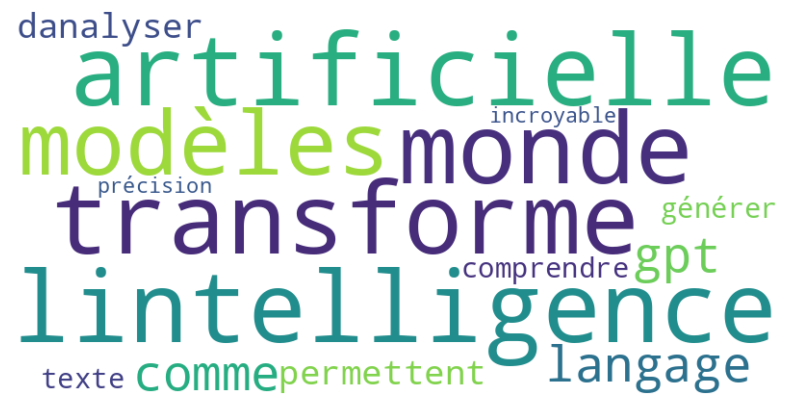

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import string

# Télécharger les stopwords de NLTK
nltk.download('stopwords')

# Charger un texte d'exemple
texte = """L'intelligence artificielle transforme le monde. Les modèles de langage 
comme GPT permettent d'analyser, comprendre et générer du texte avec une précision incroyable."""

# Nettoyage du texte
stop_words = set(stopwords.words('french'))  # Liste des mots inutiles en français
texte = texte.lower()  # Mettre en minuscules
texte = texte.translate(str.maketrans('', '', string.punctuation))  # Supprimer la ponctuation
mots = texte.split()  # Découper le texte en mots
mots_filtres = [mot for mot in mots if mot not in stop_words]  # Supprimer les stopwords

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(mots_filtres))

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()